a. Derive the mathematical expression for the variable Alpha given in the below code.  

Y = a + b₁X₁ + b₂X₂+...............+bₖXₖ +e
This says that Y, our dependent variable, is composed of a linear part and error. The linear part is composed of an intercept, a, and k independent variables, X1...Xk along with their associated raw score regression weights b1...bk.

In matrix terms, the same equation can be written:

y =X𝛼+e

Let's assume that error will equal zero 

y = X𝛼

Now we want to solve for 𝛼, so we need to get rid of X.multiplying both sides of the equation by X':

X'y = X'X𝛼

X’X will definitely be a square matrix. So inverse will exist for square matrix if det is not zewro. Lets say inverse exists. I will multiply both sides by (X’X)⁻¹


(X’X)⁻¹ X'y = (X’X)⁻¹(X'X)𝛼

It turns out that a matrix multiplied by its inverse is the identity matrix (A⁻¹A =I):

(X’X)⁻¹ X'y=I𝛼

and a matrix multiplied by the identity matrix is itself (AI = IA = A):

(X’X)⁻¹ X'y=𝛼

which is the desired result.









In [1]:
import numpy as np
m=5;
c=10;
#randnums= np.random.randint(1,101,5)
arr = np.arange(start=-5, stop=6, step=1)
#Return evenly spaced values within a given interval.
print(arr)


[-5 -4 -3 -2 -1  0  1  2  3  4  5]


In [2]:
#x=arr.transpose
x=np.array([arr]).T
print(x)
print(x.shape)
n=len(x)
print(n)


[[-5]
 [-4]
 [-3]
 [-2]
 [-1]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]]
(11, 1)
11


In [3]:
y=m*x+c
#noise= 5*randn(n,1);
#noise = 5 * np.random.rand(n, 1)
print(y)

[[-15]
 [-10]
 [ -5]
 [  0]
 [  5]
 [ 10]
 [ 15]
 [ 20]
 [ 25]
 [ 30]
 [ 35]]


In [4]:
#noise = 5 * np.random.randint(1,10,size=(n, 1))
noise = 5 * np.random.rand(n, 1)
print(noise)


[[3.19860075]
 [3.75501493]
 [1.13246731]
 [4.34539179]
 [2.6853701 ]
 [1.55159904]
 [4.43961166]
 [4.46865529]
 [3.71382579]
 [3.94348021]
 [0.77496498]]


In [5]:
yd=y+noise;
print(yd)


[[-11.80139925]
 [ -6.24498507]
 [ -3.86753269]
 [  4.34539179]
 [  7.6853701 ]
 [ 11.55159904]
 [ 19.43961166]
 [ 24.46865529]
 [ 28.71382579]
 [ 33.94348021]
 [ 35.77496498]]


In [6]:
#A = np.array([x,np.ones((n,1))])
#print(A)
#X0 = np.ones((n,1))
#Xnew = np.hstack((X,X0))
col = np.ones((n,1))
#The numpy.ones() function returns a new array of given shape and type, with ones.
A = np.hstack((x,col))
#Stack arrays in sequence columnwise
print(A)
print(A.shape)

[[-5.  1.]
 [-4.  1.]
 [-3.  1.]
 [-2.  1.]
 [-1.  1.]
 [ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]]
(11, 2)


In [7]:
A_transpose= A.T
print(A_transpose)


[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


In [8]:
#z=A_transpose * A
#z=np.dot(A.T * A)
z= A_transpose.dot(A)
print(z)


[[110.   0.]
 [  0.  11.]]


In [9]:
A_inverse = np.linalg.inv(z)
#We use numpy.linalg.inv() function to calculate the inverse of a matrix.
print(A_inverse)
#Alpha= inv()*A'*yd
#Alpha = z * A_transpose * yd
dummy = A_inverse.dot(A_transpose)
print(dummy)
Alpha = dummy.dot(yd)
print(Alpha)
#dummy = np.linalg.pinv(A_transpose * A) * (A_transpose) * (yd)

[[0.00909091 0.        ]
 [0.         0.09090909]]
[[-0.04545455 -0.03636364 -0.02727273 -0.01818182 -0.00909091  0.
   0.00909091  0.01818182  0.02727273  0.03636364  0.04545455]
 [ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909]]
[[ 4.98527751]
 [13.09172562]]


b. Write the python code to compute the Projection Matrix. Use the matrix stored in the variable ‘A’ in Q.No.1          

In [10]:
#P = A(A_transpose * A)A_transpose
P = A.dot(z)
print(P)
Projection = P.dot(A_transpose)
print(Projection)

[[-550.   11.]
 [-440.   11.]
 [-330.   11.]
 [-220.   11.]
 [-110.   11.]
 [   0.   11.]
 [ 110.   11.]
 [ 220.   11.]
 [ 330.   11.]
 [ 440.   11.]
 [ 550.   11.]]
[[ 2761.  2211.  1661.  1111.   561.    11.  -539. -1089. -1639. -2189.
  -2739.]
 [ 2211.  1771.  1331.   891.   451.    11.  -429.  -869. -1309. -1749.
  -2189.]
 [ 1661.  1331.  1001.   671.   341.    11.  -319.  -649.  -979. -1309.
  -1639.]
 [ 1111.   891.   671.   451.   231.    11.  -209.  -429.  -649.  -869.
  -1089.]
 [  561.   451.   341.   231.   121.    11.   -99.  -209.  -319.  -429.
   -539.]
 [   11.    11.    11.    11.    11.    11.    11.    11.    11.    11.
     11.]
 [ -539.  -429.  -319.  -209.   -99.    11.   121.   231.   341.   451.
    561.]
 [-1089.  -869.  -649.  -429.  -209.    11.   231.   451.   671.   891.
   1111.]
 [-1639. -1309.  -979.  -649.  -319.    11.   341.   671.  1001.  1331.
   1661.]
 [-2189. -1749. -1309.  -869.  -429.    11.   451.   891.  1331.  1771.
   2211.]
 [-2739. -2189

# c writing corresponding python code

Mu=[160 70]; % mean values of height and weight variables X and Y.
VarX=9; VarY=16; % variance of X and Y variables
CorC=0.8; % Correlation Coefficient between X and Y
CoVarXY=CorC*sqrt(VarX)*sqrt(VarY); Covariance between X and Y
Sigma=[VarX CoVarXY; CoVarXY VarY ]; % Covariance matrix
% Generate 500 datapoints
N=500;
Data=mvnrnd(Mu,Sigma,N); % variables X and Y are in columns
plot(Data(:,1),Data(:,2),'.') ;
xlabel('independent variable HEIGHT');
ylabel('dependent variable WEIGHT');

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
Mu = np.array([160,70])
print(Mu)

[160  70]


In [12]:
VarX=9;
VarY=16;
CorC=0.8;# between -1 & +1
#Covariance signifies the direction of the linear relationship between the two variables. 
#By direction we mean if the variables are directly proportional or inversely proportional to each other.
CoVarXY = (CorC * (math.sqrt(VarX)) * (math.sqrt(VarY)))
Sigma = np.array([[VarX,CoVarXY],[CoVarXY, VarY]]);
N=500;
Data = np.random.multivariate_normal(Mu,Sigma,N)
print(Data)

[[154.55736144  64.33681975]
 [160.04077562  70.53338107]
 [159.85425226  74.09901423]
 [168.40434297  78.65079644]
 [161.48752982  67.37715343]
 [162.84547985  72.9606363 ]
 [162.41217551  70.8867116 ]
 [161.82402248  74.61598525]
 [159.6764048   71.11230867]
 [156.4595112   63.74117555]
 [158.03442993  66.70618129]
 [159.38633387  69.25861306]
 [162.40132726  70.84947902]
 [161.92009219  71.41286226]
 [155.3120612   68.10121804]
 [162.86966868  74.39226177]
 [163.42309068  75.69927718]
 [164.24675614  76.62616689]
 [163.99280905  73.99529696]
 [162.99258399  73.54820605]
 [155.48685724  67.41438013]
 [162.02794022  75.99931373]
 [155.51924308  68.53713579]
 [158.60863901  66.3297117 ]
 [161.44562369  73.42109159]
 [160.28556883  73.57895181]
 [153.68923725  67.44447249]
 [159.70018404  69.03968026]
 [155.03564416  63.01961501]
 [156.58985784  67.6265103 ]
 [157.76351179  68.57273755]
 [162.15388556  73.48924562]
 [157.84668177  69.25671096]
 [157.72362765  67.505452  ]
 [158.01482417

Text(0, 0.5, 'dependent variable WEIGHT')

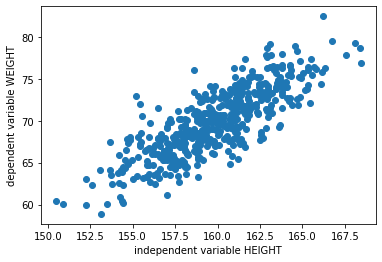

In [13]:
plt.scatter(Data[:,0],Data[:,1])
plt.xlabel('independent variable HEIGHT')
plt.ylabel('dependent variable WEIGHT')

In [14]:
x = Data[:,0]

In [15]:
x.shape
#print(x)

(500,)

In [16]:
x = x.reshape((500,1))

In [17]:
y = Data[:,1]

In [18]:
y = y.reshape((500,1))
y.shape

(500, 1)

Text(0, 0.5, 'dependent variable WEIGHT')

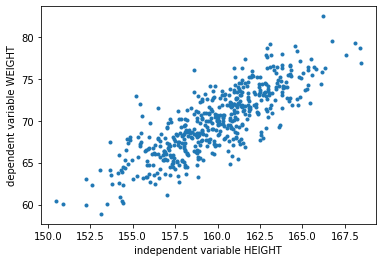

In [19]:
plt.plot(x,y,'.') 
plt.xlabel('independent variable HEIGHT') 
plt.ylabel('dependent variable WEIGHT') 


d. Write the python code to plot the regression line for the above given data. Compute the error vector and check whether the error vector is orthogonal to the column space of the data matrix.

In [20]:
one1 = np.ones((500,1))
one1.shape

(500, 1)

In [21]:
A = np.concatenate((x,one1),axis=1)
#The axis along which the arrays will be joined. If axis is None, arrays are flattened before use. Default is 0.
#A = np.hstack
print(A)

[[154.55736144   1.        ]
 [160.04077562   1.        ]
 [159.85425226   1.        ]
 [168.40434297   1.        ]
 [161.48752982   1.        ]
 [162.84547985   1.        ]
 [162.41217551   1.        ]
 [161.82402248   1.        ]
 [159.6764048    1.        ]
 [156.4595112    1.        ]
 [158.03442993   1.        ]
 [159.38633387   1.        ]
 [162.40132726   1.        ]
 [161.92009219   1.        ]
 [155.3120612    1.        ]
 [162.86966868   1.        ]
 [163.42309068   1.        ]
 [164.24675614   1.        ]
 [163.99280905   1.        ]
 [162.99258399   1.        ]
 [155.48685724   1.        ]
 [162.02794022   1.        ]
 [155.51924308   1.        ]
 [158.60863901   1.        ]
 [161.44562369   1.        ]
 [160.28556883   1.        ]
 [153.68923725   1.        ]
 [159.70018404   1.        ]
 [155.03564416   1.        ]
 [156.58985784   1.        ]
 [157.76351179   1.        ]
 [162.15388556   1.        ]
 [157.84668177   1.        ]
 [157.72362765   1.        ]
 [158.01482417

In [22]:
a_transpose = np.transpose(A)
matrix_one = a_transpose.dot(A)
#print(matrix_one)

In [23]:
inv = np.linalg.inv(matrix_one)
matrix_two = inv.dot(a_transpose)
#print(matrix_two)

In [24]:
alpha = matrix_two.dot(y)
alpha.shape


(2, 1)

In [25]:
ycap = A.dot(alpha)


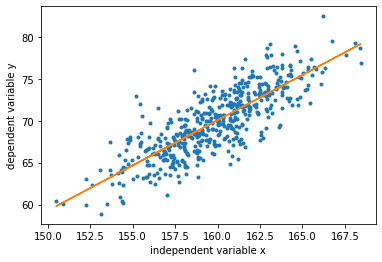

In [26]:
plt.plot(x,y,'.');
plt.plot(x, ycap); 
plt.xlabel('independent variable x');
plt.ylabel('dependent variable y');

In [27]:
error_vec = y - ycap
print(error_vec)

[[ 1.44413786e-01]
 [ 4.23088806e-01]
 [ 4.19002429e+00]
 [-4.85740957e-01]
 [-4.29452496e+00]
 [-1.76587757e-01]
 [-1.78287573e+00]
 [ 2.58115260e+00]
 [ 1.39525775e+00]
 [-2.50409486e+00]
 [-1.23879475e+00]
 [-1.45383495e-01]
 [-1.80840051e+00]
 [-7.25652095e-01]
 [ 3.09431453e+00]
 [ 1.22893231e+00]
 [ 1.93867596e+00]
 [ 1.97663801e+00]
 [-3.80163623e-01]
 [ 2.52222219e-01]
 [ 2.21883081e+00]
 [ 3.74440613e+00]
 [ 3.30663458e+00]
 [-2.23497023e+00]
 [ 1.79463972e+00]
 [ 3.20447043e+00]
 [ 4.18897556e+00]
 [-7.03034028e-01]
 [-1.68896987e+00]
 [ 1.24056539e+00]
 [ 9.20145542e-01]
 [ 1.09841354e+00]
 [ 1.51435909e+00]
 [-1.04095686e-01]
 [-9.41618266e-01]
 [ 5.20629364e+00]
 [ 3.59386187e+00]
 [-1.04739024e+00]
 [-6.86252827e-01]
 [ 3.14404411e+00]
 [-4.99003152e-01]
 [-3.49140612e+00]
 [-3.21007336e+00]
 [-2.60111107e+00]
 [-2.22603412e+00]
 [ 3.12087489e+00]
 [-1.87581027e+00]
 [-1.53765078e-01]
 [ 1.32284648e-01]
 [-3.78326540e+00]
 [ 4.09615992e+00]
 [ 4.85788937e-01]
 [ 2.3195129

In [28]:
ans = np.dot(a_transpose,error_vec)

Checking Orthogonality

In [29]:
error_vec_transpose = error_vec.reshape(1,500)
error_vec_transpose.shape

(1, 500)

In [30]:
#np.matmul(error_vec_transpose,A).round(2)
ortho = error_vec_transpose.dot(A)
print(ortho.round(2))

[[-0. -0.]]
